# Seepage analysis using Finite Difference Method

## Gauss-Seidel iteration

In [ ]:
import numpy as np

import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

# Convolution
from scipy.ndimage import convolve, generate_binary_structure

# Geometry
## Dam
ldam = 200
rdam = 240

## Head
h = np.zeros([80, 440])
lhead = 105
rhead = 80

# Left head
h[0, 0:ldam]= lhead
# Right head
h[0, (ldam + 1):439]= rhead

# Error and tolerance
tolerance = 1.E-9
error = 1.0
step = 0

# Residual
residual = np.zeros([80, 440])

(nrows, ncols) = h.shape

# Gauss-Seidel iteration
while error > tolerance:
    step = step + 1
    # Copy the head grid to residual
    residual = h.copy()
    
    for i in range(0, nrows):
        for j in range(0, ncols):
            # Top left side of dam boundary assign head
            if i == 0 and j <= (ldam + 1):
                h[i,j] = lhead
            
            # Top boundary beneath the dam
            elif i == 0 and j > (ldam + 1) and j < (rdam + 1):
                h[i,j] = (h[i,j-1]+h[i,j+1]+2*h[i+1,j])/4;
            
            # Top right side of dam boundary assign head
            elif i == 0 and j > (rdam):
                h[i,j]= rhead
                
            # Left boundary
            elif j == 0 and i > 0 and i < (nrows -1):
                h[i,j]=(h[i-1,j]+h[i+1,j]+2*h[i,j+1])/4

            # Right boundary
            elif j == (ncols -1) and i > 0 and i < (nrows - 1):
                h[i,j]=(2*h[i,j-1]+h[i-1,j]+h[i+1,j])/4
            
            # Left bottom corner
            elif i == (nrows -1) and j == 0:
                h[i,j]=(h[i-1,j]+h[i,j+1])/2
            
            # Bottom boundary
            elif i == (nrows -1) and j > 0 and j < (ncols - 1):
                h[i,j]=(h[i,j-1]+h[i,j+1]+2*h[i-1,j])/4
            
            # Right bottom corner
            elif i == (nrows -1) and  j == (ncols -1):
                h[i,j]=(h[i,j-1]+h[i-1,j])/2
            
            # Domain
            else:
                h[i,j]=(h[i-1,j]+h[i+1,j]+h[i,j-1]+h[i,j+1])/4
    
    # Error
    error = (np.square(np.subtract(h, residual))).max()

print('# of steps: %d, error: %le' %(step, error))

In [ ]:
plt.contour(np.flipud(h))

## Jacobi iteration

# of steps: 33133, error: 9.997234e-11


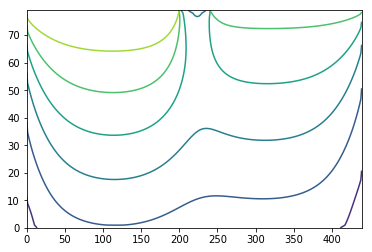

In [3]:
import numpy as np

import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

# Convolution
from scipy.ndimage import convolve, generate_binary_structure

# Geometry
rows = 80
cols = 440

## Dam
ldam = 200
rdam = 240

## Head
h = np.zeros([rows, cols])
lhead = 105
rhead = 80

# Left head
h[0,0:ldam]= lhead
# Right head
h[0,(ldam+1):(cols-1)]= rhead

# Error and tolerance
tolerance = 1.E-10
error = 1.0
step = 0

# Residual
residual = np.zeros([80, 440])

(nrows, ncols) = h.shape

# Jacobi iteration
while error > tolerance:
    # Number of steps
    step = step + 1
    
    # Copy the head grid to residual
    residual = h.copy()
    
    # Finite Difference Method
    # Apply boundary conditions
    h[0,:ldam] = lhead     # top left
    h[0, ldam+1:rdam] = 0  # top dam
    h[0, (rdam+1):]= rhead # top right
    h[(nrows-1), :] = 0     # bottom
    h[1:, 0] = 0            # left
    h[1:, (ncols-1)] = 0    # right
    
    # Bottom boundary
    for j in range(1, (ncols-2)):
        h[(nrows -1), j] = (h[(nrows-1), j-1] +
                            2 * h[nrows-2, j] + 
                            h[(nrows-1), j+1]) / 4

    # Left boundary
    for i in range(1, (nrows-2)):
        h[i, 0] = (h[i-1, 0] + 2 * h[i, 1] + h[i+1, 0]) / 4
        
    # Right boundary
    for i in range(1, (nrows-2)):
        h[i, (ncols -1)] = (2 * h[i, (ncols-2)] + 
                                h[i-1, (ncols-1)] + 
                                h[i+1, (ncols-1)]) / 4
        
    # Left bottom corner (i == (nrows -1) and j == 0):
    # h[i,j]=(h[i-1,j]+h[i,j+1])/2
    h[(nrows-1), 0] = (h[nrows-2, 0] + h[(nrows-1), 1]) / 2
    
                
    # Right bottom corner (i == (nrows -1) and  j == (ncols -1))
    # h[i,j]=(h[i,j-1]+h[i-1,j])/2
    h[(nrows-1), (ncols-1)] = (h[(nrows-1), (ncols-2)] + 
                               h[(nrows-2), (ncols-1)]) / 2
        
    # h[i, j] = (h[i-1, j] + h[i, j-1] + h[i, j+1] + h[i+1, j]) / 4
    # Define a kernel function with active neighbours
    k = generate_binary_structure(2, 1)
    k[1, 1] = False
    
    # Use convolution instead of loop iteration
    # https://en.wikipedia.org/wiki/Convolution
    h = convolve(h, k, mode='constant', cval=0.0)
    h *= 0.25
    # h[1:(nrows-2),1:(ncols-2)] = B[1:(nrows-2),1:(ncols-2)].copy()
        
    # Apply boundary conditions
    # Top left side of dam boundary assign head
    # if i == 0 and j < ldam + 2:
    h[0,:ldam] = lhead
                
    # Top right side of dam boundary assign head
    # elif i == 0 and j > rdam:
    h[0, (rdam+1):]= rhead
    
    # Top boundary beneath the dam
    for j in range((ldam+1), rdam):
        h[0,j] = (h[0, j-1] + 2 * h[1, j] + h[0, j+1]) / 4;

    # Bottom boundary
    for j in range(1, (ncols-2)):
        h[(nrows -1), j] = (h[(nrows-1), j-1] +
                            2 * h[nrows-2, j] + 
                            h[(nrows-1), j+1]) / 4

    # Left boundary
    for i in range(1, (nrows-2)):
        h[i, 0] = (h[i-1, 0] + 2 * h[i, 1] + h[i+1, 0]) / 4
        
    # Right boundary
    for i in range(1, (nrows-2)):
        h[i, (ncols -1)] = (2 * h[i, (ncols-2)] + 
                                h[i-1, (ncols-1)] + 
                                h[i+1, (ncols-1)]) / 4
        
    # Left bottom corner (i == (nrows -1) and j == 0):
    # h[i,j]=(h[i-1,j]+h[i,j+1])/2
    h[(nrows-1), 0] = (h[nrows-2, 0] + h[(nrows-1), 1]) / 2
    
                
    # Right bottom corner (i == (nrows -1) and  j == (ncols -1))
    # h[i,j]=(h[i,j-1]+h[i-1,j])/2
    h[(nrows-1), (ncols-1)] = (h[(nrows-1), (ncols-2)] + 
                               h[(nrows-2), (ncols-1)]) / 2

                
    error = (np.square(np.subtract(h, residual))).max()
    
print('# of steps: %d, error: %le' %(step, error))
plt.contour(np.flipud(h))

In [ ]:
plt.contour(np.flipud(h))